# Abstract

The United States of America (USA), also known as the United States (U.S. or US) or America, is a country mainly located in North America. It chiefly consists of 51 states including Washington DC and 5 territories and had a population of 328 million people in 2019.
    Looking back at the figures from 2020 on the IQAir website the US obtained an overall ranking of 84 out of a total of 106 world cities. The average annual figure was US AQI 40, in comparison to Bangladesh which was the most polluted country with a US AQI figure of 162.

The cleanest city was Waimea, Hawaii with a figure of just 9, whereas the most polluted city was Yosemite Lakes, California with a figure of 107.



<img src="https://fm.cnbc.com/applications/cnbc.com/resources/img/editorial/2018/04/18/105140449-GettyImages-2020236.1910x1000.jpg?v=1524065290" alt="image info" />

### Air-Pollution:

There are a wide variety of different chemical compounds and hazardous particulate matter in the air across the various states and cities of America. With its large and growing population, coupled with other factors such as increased vehicle ownership, there are subsequent releases of many different contaminants into the air as a result of various combustion processes.

As well as this, there are other activities that can release large amounts of coarse or fine particulate matter into the air **(PM10 or PM2.5)**, usually through the disruption of large amounts of earth or rock through various processes such as mining and the extraction of materials, as well as construction sites or other similar areas.

Some of these chemical pollutants released from the various combustion sources include ones such as nitrogen dioxide **(NO2)** and sulfur dioxide **(SO2)**, both of which see large amounts of release through vehicular emissions, with nitrogen dioxide being the chief offender here. It can typically be found over areas that see a high volume of traffic, so much so to the point that large accumulations of it are often strong indicators that a majority of pollution in any given area is caused by vehicles.

Both of these chemical compounds can contribute to instances of acid rain, as well as causing irritation and inflammation to the lining of the respiratory tract and lungs, causing a myriad of issues that will be discussed in more detail further on.

Other pollutants include ones such as black carbon and volatile organic compounds **(VOCs)**, both of which are formed from the incomplete combustion of both fossil fuels and organic matter, and as such can see their creation in vehicle engines, factory boilers and even fireplaces or stoves in people’s homes (essentially anywhere that has a source of combustion taking place).

In a similar vein, ozone **(O3)** is also another pollutant of particular concern, mostly due to its prevalence amongst many cities in America. It is created when the various oxides of nitrogen **(NOx)** and other gases or chemicals released from cars and other similar sources, are exposed to sunlight. This causes a chemical reaction that creates ozone, or smog as it is better known when it gathers in large accumulations. Whilst this a vital part of the upper atmosphere, on ground level it can prove to have very negative health effects, hence why it is counted amongst the several pollutants that go into calculating the **AQI**, or air quality index.

For getting the current air quality of 769 cities of USA ,I will use the links from **kaggle** :**https://www.kaggle.com/mahbubrob/usa-cities** to get the data regarding all cities of USA and I will take help of **Rapid API** to get the **Air quality data** by the link : **https://rapidapi.com/weatherbit/api/air-quality/**

## Importing the necessary libraries

In [18]:
# For data loading e.g(read_csv,read_excel..)
import pandas as pd

# Seaborn standard import
import seaborn as sns

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import requests

# plotly standard imports
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py

#Import cufflinks which is the wrapper of plotly
import cufflinks as cf

#Display all the cell output which will be interactive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#Set plotly+cufflinks in offline mode
from plotly.offline import iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

import warnings
warnings.filterwarnings('ignore')

### Loading the datasets from kaggle to get all cities of USA and respective latitude and longitude values.

In [2]:
city=pd.read_csv("C:/Users/sushr/Downloads/USA-Cities/usa_cities.csv")

In [3]:
city

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province,abbr
0,Calais,Calais,45.165989,-67.242392,1781.5,United States of America,US,USA,Maine,NaN
1,Houlton,Houlton,46.125517,-67.839720,6051.5,United States of America,US,USA,Maine,NaN
2,Presque Isle,Presque Isle,46.793409,-68.002165,9466.0,United States of America,US,USA,Maine,NaN
3,Bar Harbor,Bar Harbor,44.387897,-68.204375,4483.5,United States of America,US,USA,Maine,NaN
4,Bangor,Bangor,44.801153,-68.778345,40843.0,United States of America,US,USA,Maine,NaN
...,...,...,...,...,...,...,...,...,...,...
764,Point Hope,Point Hope,68.347726,-166.808020,461.0,United States of America,US,USA,Alaska,NaN
765,Wales,Wales,65.609599,-168.087503,99.0,United States of America,US,USA,Alaska,NaN
766,Nikolski,Nikolski,52.938434,-168.867688,18.0,United States of America,US,USA,Alaska,NaN
767,Gambell,Gambell,63.779710,-171.731079,681.0,United States of America,US,USA,Alaska,NaN


As we can see from above dataframe("city"),there are 769 numbers of cities present in the USA and the column("city") contains cities name and the columns("lat" & "lng") contain latitude and longitude values.

## Get data from the API

https://rapidapi.com/weatherbit/api/air-quality/

The API provides three endpoints: Air Quality History, Current Air Quality and Air Quality Forecast. The **'Current Air Quality'** endpoint was selected for this analysis. Under this endpoint, rapid api offers unlimited numbers of requests per month for  free account.

All needed for the request are Latitude and Longitude value of a place. These values are taken for getting the current air quality of USA, which can be looked up on **usa-cities** dataframe from kaggle.

### Description of the data

- lat: Latitude (Degrees).
- lon: Longitude (Degrees).
- timezone: Local IANA Timezone.
- city_name: Nearest city name.
- country_code: Country abbreviation.
- state_code: State abbreviation/code.state_codes of US: https://en.wikipedia.org/wiki/ISO_3166-2:US#:~:text=Current%20codes%20%20%20%20Code%20%20,%20%20state%20%2053%20more%20rows%20
- aqi: Air Quality Index [US - EPA standard 0 - +500]
- o3: Concentration of surface O3 (µg/m³)
- so2: Concentration of surface SO2 (µg/m³)
- no2: Concentration of surface NO2 (µg/m³)
- co: Concentration of carbon monoxide (µg/m³)
- pm25: Concentration of particulate matter < 2.5 microns (µg/m³)
- pm10: Concentration of particulate matter < 10 microns (µg/m³)
- pollen_level_tree: Tree pollen level (0 = None, 1 = Low, 2 = Moderate, 3 = High, 4 = Very High)
- pollen_level_grass: Grass pollen level (0 = None, 1 = Low, 2 = Moderate, 3 = High, 4 = Very High)
- pollen_level_weed: Weed pollen level (0 = None, 1 = Low, 2 = Moderate, 3 = High, 4 = Very High)
- mold_level: Mold pollen level (0 = None, 1 = Low, 2 = Moderate, 3 = High, 4 = Very High)
- predominant_pollen_type: Predominant pollen type (Trees/Weeds/Molds/Grasses) 

In [4]:
# creating an empty pandas dataframe ("usa_cities")
usa_cities=pd.DataFrame()

# Keep the range of i till length of the kaggle dataframe("city")
for i in range(len(city)):
    
        url = "https://air-quality.p.rapidapi.com/current/airquality"

        querystring = {"lat":(city.loc[i,"lat"]),"lon":(city.loc[i,"lng"])}

        headers = {
            'x-rapidapi-key': "78ac36594fmsh463a4013612e25ep152223jsn647171b1d90f",
            'x-rapidapi-host': "air-quality.p.rapidapi.com"
            }

        response_current1 = requests.request("GET", url, headers=headers, params=querystring)
        response_current1=response_current1.json()
        some_file=pd.json_normalize(data=response_current1,record_path="data",meta=["city_name","lon","timezone","lat","country_code","state_code"])

        # Appending the pandas dataframe ("some_file") to the created empty dataframe ("usa_cities")
        usa_cities= usa_cities.append(some_file,ignore_index=True)
    

In [5]:
usa_cities.head()

,mold_level,aqi,pm10,co,o3,predominant_pollen_type,so2,pollen_level_tree,pollen_level_weed,no2,pm25,pollen_level_grass,city_name,lon,timezone,lat,country_code,state_code
0,0,31,4.716110,399.292,68.0000,Molds,0.067172,0,0,2.37767,3.247730,0,Whitlocks Mill,-67.24,America/New_York,45.17,US,ME
1,0,30,0.441512,302.911,64.7306,Molds,0.069500,0,0,3.37907,0.236421,0,"VA Boston Healthcare System, West Roxbury Campus",-67.84,America/New_York,46.13,US,ME
2,0,26,9.000000,160.300,56.0000,Molds,0.000000,0,0,0.00000,5.900000,0,McGraw,-68,America/New_York,46.79,US,ME
3,0,38,6.283240,437.260,82.0000,Molds,0.000000,0,0,3.52366,3.700000,0,Bar Harbor,-68.2,America/New_York,44.39,US,ME
4,0,33,2.387890,367.165,72.0000,Molds,0.056403,0,0,9.38214,1.790920,0,Bangor,-68.78,America/New_York,44.8,US,ME


In [6]:
# checking the shape
usa_cities.shape

(769, 18)

In [7]:
# checking the columns name
usa_cities.columns

Index(['mold_level', 'aqi', 'pm10', 'co', 'o3', 'predominant_pollen_type',
       'so2', 'pollen_level_tree', 'pollen_level_weed', 'no2', 'pm25',
       'pollen_level_grass', 'city_name', 'lon', 'timezone', 'lat',
       'country_code', 'state_code'],
      dtype='object')

In [8]:
# dropping unused columns
usa_cities.drop(columns=["predominant_pollen_type","pollen_level_tree",'mold_level','pollen_level_weed','pollen_level_grass','timezone','country_code'],inplace=True)

In [9]:
usa_cities.head()

,aqi,pm10,co,o3,so2,no2,pm25,city_name,lon,lat,state_code
0,31,4.716110,399.292,68.0000,0.067172,2.37767,3.247730,Whitlocks Mill,-67.24,45.17,ME
1,30,0.441512,302.911,64.7306,0.069500,3.37907,0.236421,"VA Boston Healthcare System, West Roxbury Campus",-67.84,46.13,ME
2,26,9.000000,160.300,56.0000,0.000000,0.00000,5.900000,McGraw,-68,46.79,ME
3,38,6.283240,437.260,82.0000,0.000000,3.52366,3.700000,Bar Harbor,-68.2,44.39,ME
4,33,2.387890,367.165,72.0000,0.056403,9.38214,1.790920,Bangor,-68.78,44.8,ME


In [10]:
usa_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aqi         769 non-null    int64  
 1   pm10        769 non-null    float64
 2   co          769 non-null    float64
 3   o3          769 non-null    float64
 4   so2         769 non-null    float64
 5   no2         769 non-null    float64
 6   pm25        769 non-null    float64
 7   city_name   769 non-null    object 
 8   lon         769 non-null    object 
 9   lat         769 non-null    object 
 10  state_code  769 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 66.2+ KB


### checking the duplicate values

In [11]:
#check duplicates
usa_cities.duplicated().sum()

0

### checking the missing values

In [12]:
usa_cities.isna().sum()

aqi           0
pm10          0
co            0
o3            0
so2           0
no2           0
pm25          0
city_name     0
lon           0
lat           0
state_code    0
dtype: int64

From above we can see that,there are no missing or NaN values present in the dataframe. So **"usa_cities"** is the cleaned dataset.

In [13]:
usa_cities

,aqi,pm10,co,o3,so2,no2,pm25,city_name,lon,lat,state_code
0,31,4.716110,399.292,68.0000,0.067172,2.377670,3.247730,Whitlocks Mill,-67.24,45.17,ME
1,30,0.441512,302.911,64.7306,0.069500,3.379070,0.236421,"VA Boston Healthcare System, West Roxbury Campus",-67.84,46.13,ME
2,26,9.000000,160.300,56.0000,0.000000,0.000000,5.900000,McGraw,-68,46.79,ME
3,38,6.283240,437.260,82.0000,0.000000,3.523660,3.700000,Bar Harbor,-68.2,44.39,ME
4,33,2.387890,367.165,72.0000,0.056403,9.382140,1.790920,Bangor,-68.78,44.8,ME
...,...,...,...,...,...,...,...,...,...,...,...
764,25,1.373020,275.373,55.0747,0.096508,0.014643,0.916909,Point Hope,-166.81,68.35,AK
765,25,3.888040,286.639,54.0912,0.246800,0.066353,2.765720,Wales,-168.09,65.61,AK
766,41,2.245910,264.943,87.7976,0.378583,0.183747,0.812543,Nikolski,-168.87,52.94,AK
767,25,0.459451,282.049,54.0912,0.026106,0.152788,0.459167,Gambell,-171.73,63.78,AK


### Saving the dataset

In [14]:
#usa_cities.to_csv('usa_cities.csv')

## Data Analysis

In [15]:
usa_cities.describe()

,aqi,pm10,co,o3,so2,no2,pm25
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,41.310793,12.960416,297.377730,75.846058,0.580016,2.371434,6.205910
std,21.735589,21.103880,89.132548,29.354816,0.708251,2.968991,9.465865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2.031300,251.174000,50.872600,0.107335,0.448490,1.201500
50%,38.000000,5.971320,294.149000,75.000000,0.406057,1.250000,3.418650
75%,51.000000,15.000000,354.648000,98.000000,0.800006,3.271970,8.000000
max,253.000000,282.000000,687.000000,157.500000,6.250000,30.000000,132.734000


### Finding the correlation between pollutants

In [16]:
numeric=usa_cities[['aqi','pm10', 'co', 'o3', 'so2', 'no2', 'pm25']]

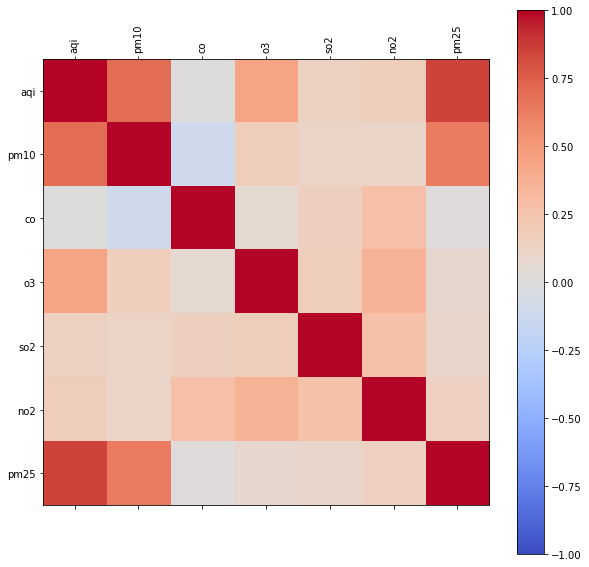

In [19]:
corr = numeric.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(numeric.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(numeric.columns)
ax.set_yticklabels(numeric.columns)
plt.show();

The “corr()” method evaluates the correlation between all the features, then it can be graphed with a color coding.

On this graph, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

Here we can see that,"pm10" and "aqi" are highly correlated.

### Relationship between pm10 and aqi

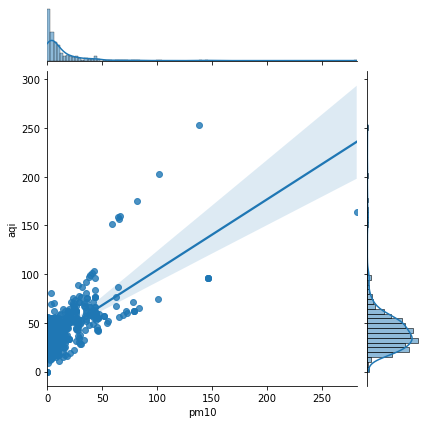

In [20]:
# defining a function to plot the relationship between two indicators ("pm10" & "aqi")
def relation(ind1="pm10", ind2="aqi"):
    relation = sns.jointplot(x=ind1, y=ind2, data=numeric, kind='reg')
relation()

from plotting for pm10 and aqi, we saw a positively sloped line indicating that the two pollutants move simultaneously

###  All state Average gas data

In [21]:
usa_cities.groupby('state_code')[['pm10','pm25','o3','so2','no2','co']].mean()

,pm10,pm25,o3,so2,no2,co
state_code,,,,,,
AK,0.956553,0.408022,59.583473,0.068417,0.238235,242.267310
AL,4.063277,2.845484,46.978336,0.764032,1.253521,377.254091
AR,4.324967,2.748782,74.401000,0.951828,1.141758,342.278400
AZ,71.918644,22.048782,83.735121,0.493653,0.767938,248.534526
CA,31.983113,11.163444,103.255665,0.680982,3.206016,247.554271
CO,20.432635,8.809103,99.490133,0.235578,1.867048,245.015333
CT,20.000000,12.683333,125.727667,1.060839,16.239378,423.366833
DC,17.311600,15.000000,69.076900,0.000000,5.694440,303.425000
DE,13.883885,10.512910,101.731000,0.178571,4.336285,394.145500


### Let see the Range of the AirQuality Index in the Data

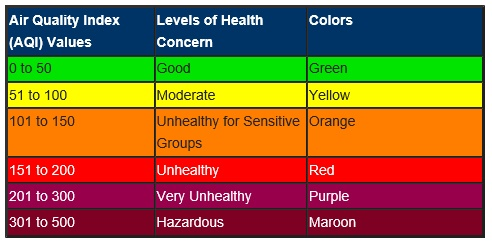

In [22]:
from IPython import display 
display.Image("https://www.extremetech.com/wp-content/uploads/2018/11/Range-of-AQI-values-for-the-USA.jpg")

In [23]:
new=usa_cities[["aqi","city_name","state_code"]]
new

,aqi,city_name,state_code
0,31,Whitlocks Mill,ME
1,30,"VA Boston Healthcare System, West Roxbury Campus",ME
2,26,McGraw,ME
3,38,Bar Harbor,ME
4,33,Bangor,ME
...,...,...,...
764,25,Point Hope,AK
765,25,Wales,AK
766,41,Nikolski,AK
767,25,Gambell,AK


In [24]:
new["Air-Quality"]=pd.cut(new.aqi,bins=[0,50,100,150,200,300,500],labels=["Good","Moderate","Unhealthy for sensitive group","Unhealthy","Very unhealthy","Hazardous"])

In [25]:
new

,aqi,city_name,state_code,Air-Quality
0,31,Whitlocks Mill,ME,Good
1,30,"VA Boston Healthcare System, West Roxbury Campus",ME,Good
2,26,McGraw,ME,Good
3,38,Bar Harbor,ME,Good
4,33,Bangor,ME,Good
...,...,...,...,...
764,25,Point Hope,AK,Good
765,25,Wales,AK,Good
766,41,Nikolski,AK,Good
767,25,Gambell,AK,Good


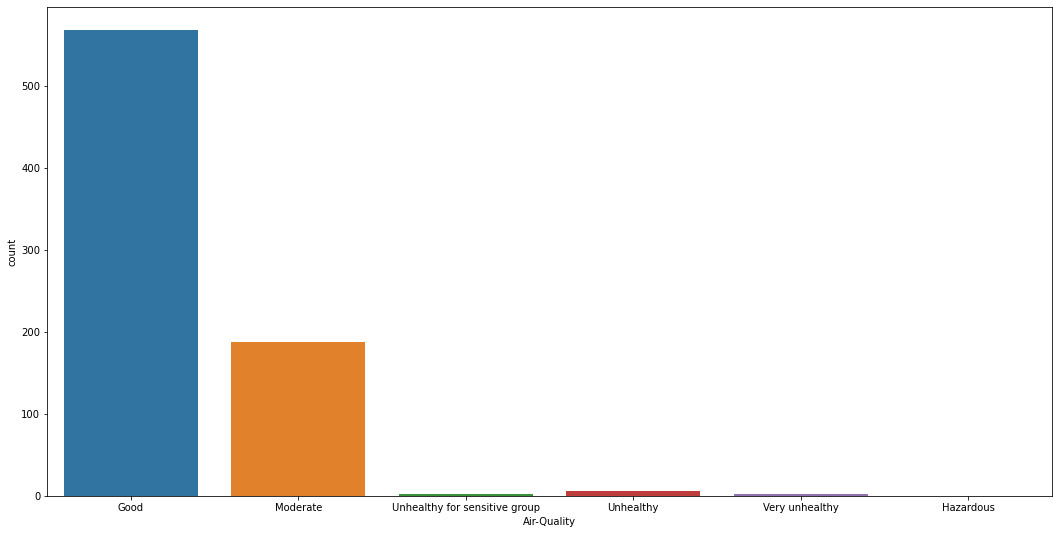

In [31]:
countplt, ax = plt.subplots(figsize = (18,9))
ax =sns.countplot(x = 'Air-Quality', data=new)

### Top 10 worst states on the basis of aqi

In [27]:
usa_cities[['state_code', 'aqi']].groupby(['state_code']).agg('mean').sort_values('aqi',
                                                                 ascending=False).head(10).style.background_gradient(cmap='viridis')

,aqi
state_code,
NM,103.294118
AZ,82.631579
RI,59.500000
CT,58.833333
CA,58.520833
NJ,58.250000
DC,56.000000
DE,52.500000
IN,51.928571


From above it is confirmed that the state "Arizona" has highest aqi value and the state "New Jersey" has lowest value in top 10 states of highest values of aqi.That means the state **Arizona** is highest polluted state of USA.

### Top 10 worst cities

In [28]:
usa_cities[['city_name', 'aqi']].groupby(['city_name']).agg('mean').sort_values('aqi',ascending=False).head(10).iplot(kind="bar")

From above graph,we can see that the city ("Casa Grande") is most polluted city in the USA.

### Lets Check the Distribution of the Pollutants in Air

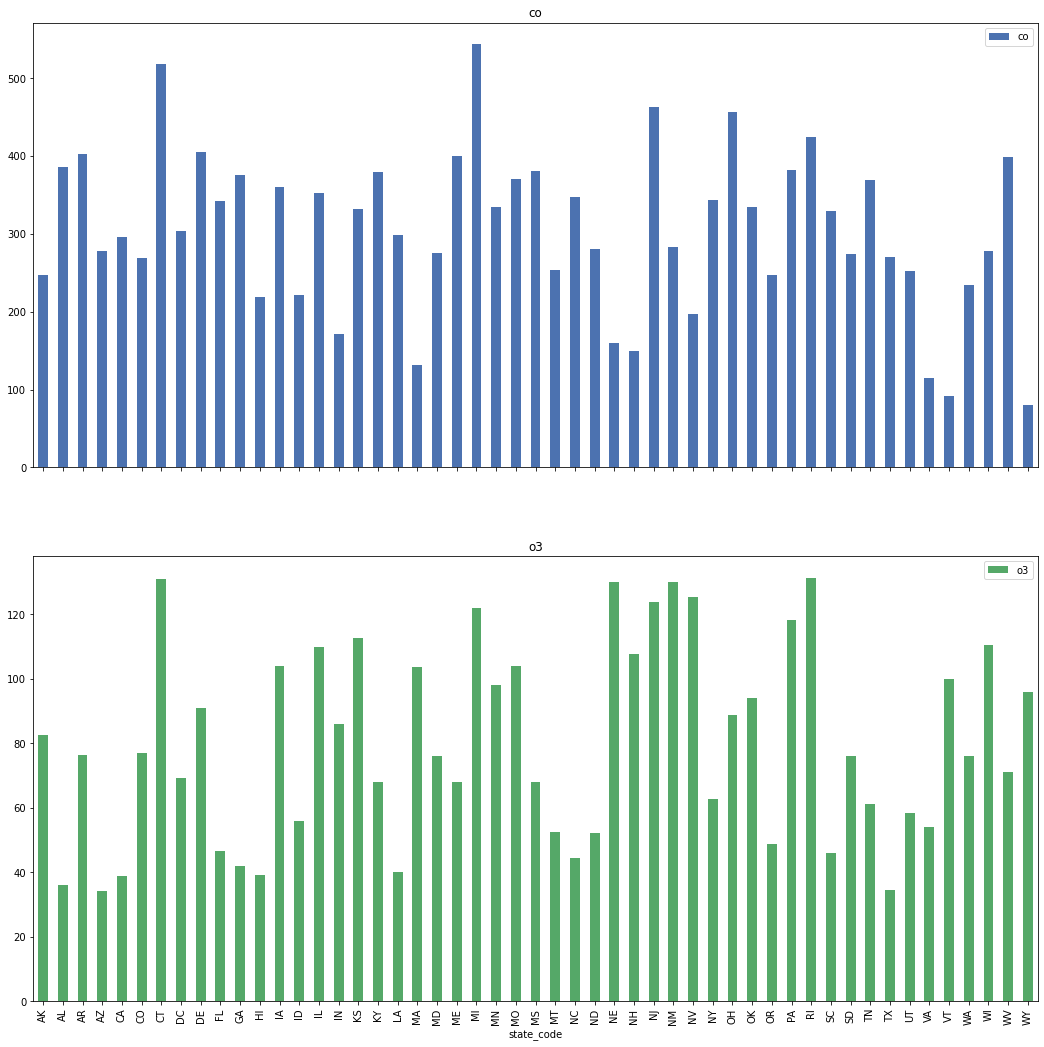

In [42]:
pollutants=(usa_cities.columns)
pollutants=list(pollutants.drop(["city_name","aqi","lon","lat","pm10","pm25"]))


usa_cities[pollutants].groupby("state_code")["co","o3"].first().plot(kind="bar",figsize=(18,18),subplots=True)
plt.show();

### Distribution of SO2 & NO2

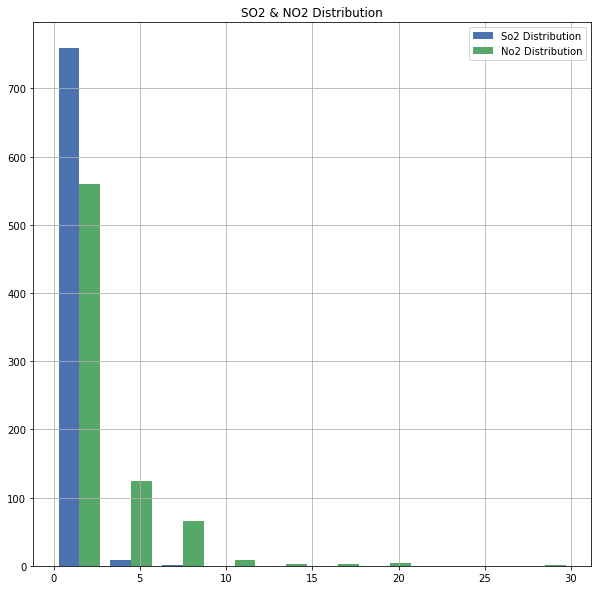

In [32]:
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
plt.grid(True)
x = usa_cities['so2']
y = usa_cities['no2']
plt.hist([x,y], label=['So2 Distribution','No2 Distribution'])
plt.legend(loc='upper right')
plt.title('SO2 & NO2 Distribution')
plt.show();